# Week 9 - Multivariate Analysis, part 2

Multivariate Analysis with Cybersecurity Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import OneHotEncoder

In [2]:
# As this dataset was cleaned localled, import it from device

from google.colab import files

upload = files.upload()

Saving NetworkSecurity_Cleaned.csv to NetworkSecurity_Cleaned.csv


In [3]:
# Set up as DataFrame

ns = pd.read_csv("NetworkSecurity_Cleaned.csv")

pd.set_option('display.max_columns', None)

ns.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,Alert Triggered,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Alert Data,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,Alert Triggered,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",39.123.165.122,Log Data,Alert Data,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,IoC Detected,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",39.123.165.122,Log Data,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,IoC Detected,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,Log Data,Alert Data,Firewall


In [4]:
ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      40000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         40000 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [5]:
# Get dummies and correlations of these columns

TrafficType = pd.get_dummies(ns['Traffic Type'])
Protocol = pd.get_dummies(ns["Protocol"])
PacketType = pd.get_dummies(ns["Packet Type"])
AttackType = pd.get_dummies(ns["Attack Type"])
AttackSignature = pd.get_dummies(ns["Attack Signature"])
ActionTaken = pd.get_dummies(ns["Action Taken"])
NetworkSegment = pd.get_dummies(ns["Network Segment"])
LogSource = pd.get_dummies(ns["Log Source"])

In [6]:
print(TrafficType.corr())

print(Protocol.corr())

print(PacketType.corr())

print(AttackType.corr())

print(AttackSignature.corr())

print(ActionTaken.corr())

print(NetworkSegment.corr())

print(LogSource.corr())

           DNS       FTP      HTTP
DNS   1.000000 -0.499247 -0.501952
FTP  -0.499247  1.000000 -0.498799
HTTP -0.501952 -0.498799  1.000000
          ICMP       TCP       UDP
ICMP  1.000000 -0.500960 -0.501723
TCP  -0.500960  1.000000 -0.497314
UDP  -0.501723 -0.497314  1.000000
         Control  Data
Control      1.0  -1.0
Data        -1.0   1.0
               DDoS  Intrusion   Malware
DDoS       1.000000  -0.500734 -0.501920
Intrusion -0.500734   1.000000 -0.497342
Malware   -0.501920  -0.497342  1.000000
                 Known Pattern A  Known Pattern B
Known Pattern A              1.0             -1.0
Known Pattern B             -1.0              1.0
          Blocked   Ignored    Logged
Blocked  1.000000 -0.503884 -0.501585
Ignored -0.503884  1.000000 -0.494515
Logged  -0.501585 -0.494515  1.000000
           Segment A  Segment B  Segment C
Segment A   1.000000  -0.497902  -0.500398
Segment B  -0.497902   1.000000  -0.501697
Segment C  -0.500398  -0.501697   1.000000
          Fir

In [7]:
# Here, map the Severity Levels (Low, Medium, High to 1, 2, 3)

level = {'Low': 1,
       'Medium': 2,
       'High': 3
       }

ns['Severity Level'] = ns['Severity Level'].map(level)
ns['Severity Level']

,Severity Level
0,1
1,1
2,1
3,2
4,1
...,...
39995,2
39996,3
39997,1
39998,1


In [8]:
# create a dummy dataframe with useful features of the ns dataset
# This step is to concatentate all the individual datasets into one dataframe
# Next step is to concatentate the this dataframe with ns dataframe

dummy_df = pd.concat([TrafficType, Protocol, PacketType, AttackType, AttackSignature, ActionTaken, NetworkSegment, LogSource], axis=1)
dummy_df

,DNS,FTP,HTTP,ICMP,TCP,UDP,Control,Data,DDoS,Intrusion,Malware,Known Pattern A,Known Pattern B,Blocked,Ignored,Logged,Segment A,Segment B,Segment C,Firewall,Server
0,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,True
1,False,False,True,True,False,False,False,True,False,False,True,True,False,True,False,False,False,True,False,True,False
2,False,False,True,False,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True,True,False
3,False,False,True,False,False,True,False,True,False,False,True,False,True,True,False,False,False,True,False,True,False
4,True,False,False,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,True,True,False,False,True,False
39996,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,True,False,False,True,True,False
39997,True,False,False,False,False,True,False,True,True,False,False,False,True,True,False,False,False,False,True,False,True
39998,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True


In [9]:
# join the ns dataset to the dummy dataset
# in new_ns, dropped the columns that dummies were created for
# severity level - code 1,2,3,4 (map: low = 1, medium=2, etc)

drop = ['Protocol', 'Traffic Type', 'Packet Type', 'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Log Source', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Device Information', 'User Information', 'Geo-location Data', 'Proxy Information', 'Payload Data']

original_ns = ns.drop(columns=drop)

new_ns = pd.concat([original_ns, dummy_df], axis=1)
new_ns = new_ns.dropna(subset=['Severity Level'])
new_ns

,Timestamp,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Severity Level,Firewall Logs,IDS/IPS Alerts,DNS,FTP,HTTP,ICMP,TCP,UDP,Control,Data,DDoS,Intrusion,Malware,Known Pattern A,Known Pattern B,Blocked,Ignored,Logged,Segment A,Segment B,Segment C,Firewall,Server
0,2023-05-30 06:33:58,503,IoC Detected,28.67,Alert Triggered,1,Log Data,Alert Data,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,True
1,2020-08-26 07:08:30,1174,IoC Detected,51.50,Alert Triggered,1,Log Data,Alert Data,False,False,True,True,False,False,False,True,False,False,True,True,False,True,False,False,False,True,False,True,False
2,2022-11-13 08:23:25,306,IoC Detected,87.42,Alert Triggered,1,Log Data,Alert Data,False,False,True,False,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True,True,False
3,2023-07-02 10:38:46,385,IoC Detected,15.79,Alert Triggered,2,Log Data,Alert Data,False,False,True,False,False,True,False,True,False,False,True,False,True,True,False,False,False,True,False,True,False
4,2023-07-16 13:11:07,1462,IoC Detected,0.52,Alert Triggered,1,Log Data,Alert Data,True,False,False,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,1428,IoC Detected,39.28,Alert Triggered,2,Log Data,Alert Data,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,True,True,False,False,True,False
39996,2023-03-27 00:38:27,1184,IoC Detected,27.25,Alert Triggered,3,Log Data,Alert Data,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,True,False,False,True,True,False
39997,2022-03-31 01:45:49,1043,IoC Detected,31.01,Alert Triggered,1,Log Data,Alert Data,True,False,False,False,False,True,False,True,True,False,False,False,True,True,False,False,False,False,True,False,True
39998,2023-09-22 18:32:38,483,IoC Detected,97.85,Alert Triggered,1,Log Data,Alert Data,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True


In [10]:
new_ns_copy = new_ns.copy()

new_ns_copy = new_ns_copy.drop(columns=['Timestamp']) # Drop Timestamp as it causes Runtime to repeatedly crash

# Convert boolean columns (True/False) to 0/1
bool_cols = new_ns_copy.select_dtypes(include=['bool']).columns # BOOL columns

new_ns_copy[bool_cols] = new_ns_copy[bool_cols].astype(int)

# Identify categorical columns (non-numeric and non-boolean)
cat_cols = new_ns_copy.select_dtypes(exclude=['number', 'bool']).columns # CATEGORICAL columns

# Apply one-hot encoding to categorical columns
new_ns_encoded = pd.get_dummies(new_ns_copy, columns=cat_cols, dtype=int)

# Display the first few rows to verify encoding
print(new_ns_encoded.head())


   Packet Length  Anomaly Scores  Severity Level  DNS  FTP  HTTP  ICMP  TCP  \
0            503           28.67               1    0    0     1     1    0   
1           1174           51.50               1    0    0     1     1    0   
2            306           87.42               1    0    0     1     0    0   
3            385           15.79               2    0    0     1     0    0   
4           1462            0.52               1    1    0     0     0    1   

   UDP  Control  Data  DDoS  Intrusion  Malware  Known Pattern A  \
0    0        0     1     0          0        1                0   
1    0        0     1     0          0        1                1   
2    1        1     0     1          0        0                0   
3    1        0     1     0          0        1                0   
4    0        0     1     1          0        0                0   

   Known Pattern B  Blocked  Ignored  Logged  Segment A  Segment B  Segment C  \
0                1        0        

In [11]:
# Correlations between the numeric columns of ns (network security) dataset

# Columns removed as there is only 1 unique value: Malware Indicators_IoC Detected / Alerts/Warnings_Alert Triggered / Firewall Logs_Log Data / IDS/IPS Alerts_Alert Data
# This causes there to be NaN values in Correlation Matrix

# Identify constant columns (those with only one unique value)
constant_columns = new_ns_encoded.columns[new_ns_encoded.nunique() == 1]

# # Drop constant columns from the dataset
new_ns_encoded_cleaned = new_ns_encoded.drop(columns=constant_columns)

# # Now compute the correlation matrix again
ns_encoded_nums = new_ns_encoded_cleaned.select_dtypes(include=['number'])
correlation = ns_encoded_nums.corr()

# # Display the cleaned correlation matrix
print(correlation)


                 Packet Length  Anomaly Scores  Severity Level       DNS  \
Packet Length         1.000000       -0.003599        0.000874 -0.000717   
Anomaly Scores       -0.003599        1.000000        0.000936  0.006153   
Severity Level        0.000874        0.000936        1.000000 -0.001856   
DNS                  -0.000717        0.006153       -0.001856  1.000000   
FTP                  -0.000852       -0.012492        0.001174 -0.499247   
HTTP                  0.001568        0.006315        0.000685 -0.501952   
ICMP                  0.006100        0.000202       -0.007588  0.002507   
TCP                  -0.005997        0.002799        0.001301  0.002796   
UDP                  -0.000121       -0.003000        0.006306 -0.005308   
Control               0.005286        0.005984        0.001001 -0.001617   
Data                 -0.005286       -0.005984       -0.001001  0.001617   
DDoS                  0.006657        0.002996        0.000402  0.004228   
Intrusion   

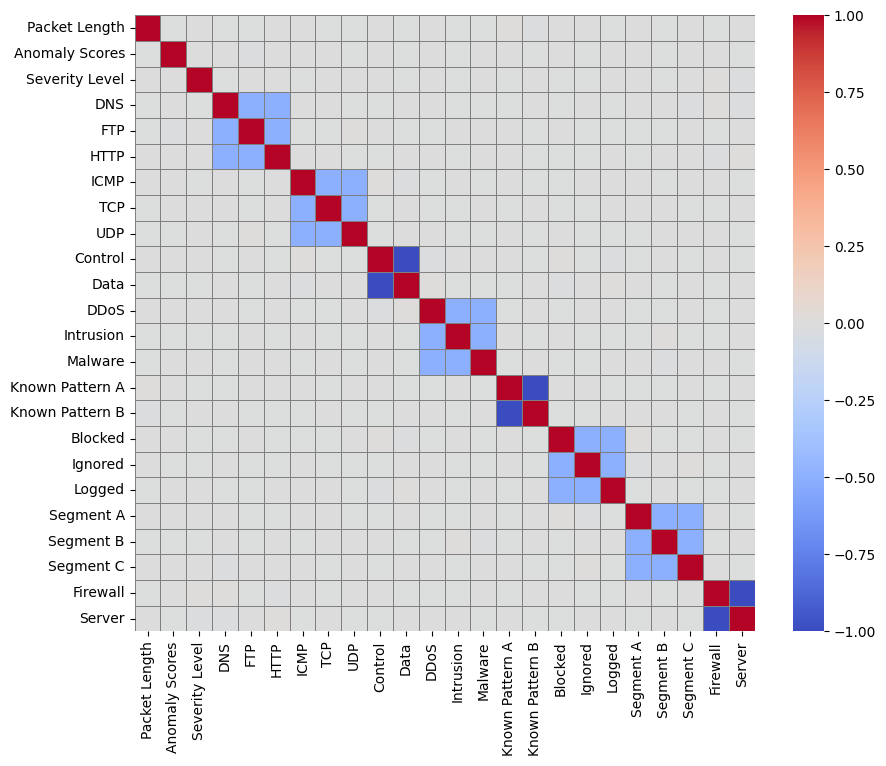

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=False, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.show()

In [13]:
# Strong correlations

unstack_corr = correlation.unstack() # 1. Unstack

drop_self_corr = unstack_corr[unstack_corr.index.get_level_values(0) != unstack_corr.index.get_level_values(1)] # 2. Drop self correlations

filter_corr = drop_self_corr[abs(drop_self_corr) >= 0.3] # 3. Filter for strong correlations

strong_pairs = filter_corr.sort_values(ascending=False).drop_duplicates()

In [14]:
pd.set_option('display.max_rows', None)

display(strong_pairs)

,,0
Logged,Ignored,-0.494515
TCP,UDP,-0.497314
Intrusion,Malware,-0.497342
Segment A,Segment B,-0.497902
HTTP,FTP,-0.498799
DNS,FTP,-0.499247
Segment A,Segment C,-0.500398
Intrusion,DDoS,-0.500734
TCP,ICMP,-0.500960
Logged,Blocked,-0.501585


<ipython-input-15-945998430f5d>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bubble_data = ns.groupby(['PacketBin', 'AnomalyBin']).size().reset_index(name='count')


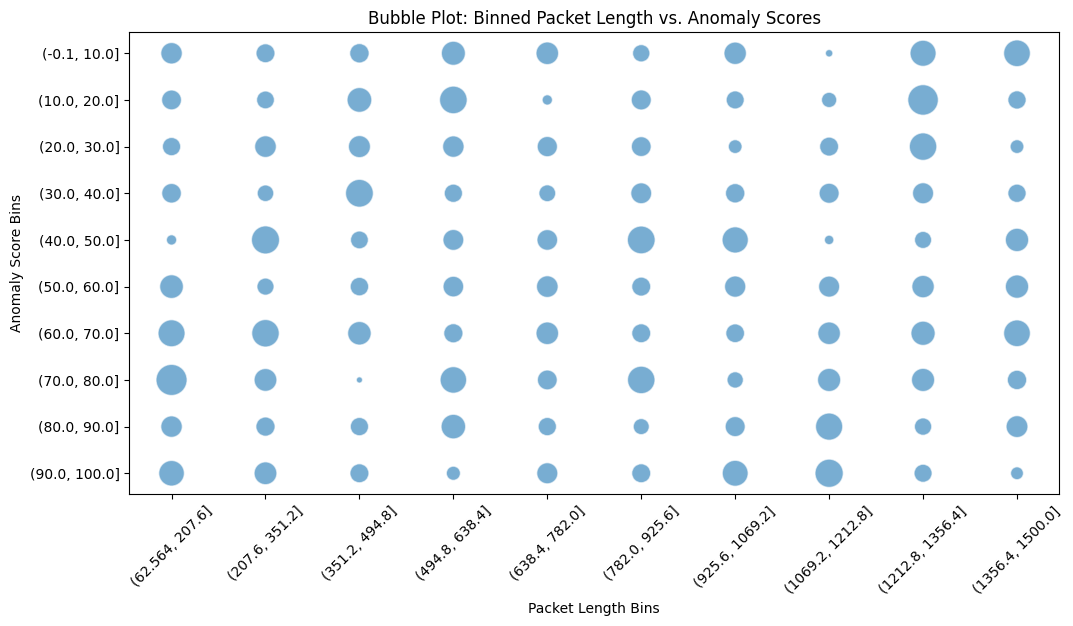

In [15]:
# Bubble Plot for Packet Length and Anomaly Scores

# Create bins

ns['PacketBin'] = pd.cut(ns['Packet Length'], bins=10)
ns['AnomalyBin'] = pd.cut(ns['Anomaly Scores'], bins=10)

bubble_data = ns.groupby(['PacketBin', 'AnomalyBin']).size().reset_index(name='count')

# Convert intervals to strings for plotting
bubble_data['PacketBin'] = bubble_data['PacketBin'].astype(str)
bubble_data['AnomalyBin'] = bubble_data['AnomalyBin'].astype(str)

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=bubble_data,
    x='PacketBin',
    y='AnomalyBin',
    size='count',
    sizes=(20, 500),
    legend=False,
    alpha=0.6
)
plt.xticks(rotation=45)
plt.title('Bubble Plot: Binned Packet Length vs. Anomaly Scores')
plt.xlabel('Packet Length Bins')
plt.ylabel('Anomaly Score Bins')
plt.show()


In [16]:
# PCA

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

features = ns_encoded_nums[["Packet Length", 'Anomaly Scores', 'DNS', 'Severity Level', 'FTP',
       'HTTP', 'ICMP', 'TCP', 'UDP', 'Control', 'Data',
            'Segment A', 'Segment B', 'Segment C', 'Firewall', 'Server']]

ns_encoded_scaled = scaler.fit_transform(features)

pca = PCA(n_components=16)

pca.fit(ns_encoded_scaled)

components5 = pca.components_

print(f"Print PCA Component 1: {components5[0]}")
print(f"Print PCA Component 2: {components5[1]}")
print(f"Print PCA Component 3: {components5[2]}")
print(f"Print PCA Component 3: {components5[3]}")
print(f"Print PCA Component 3: {components5[4]}")

print("\nExplained variance ratios:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

Print PCA Component 1: [-2.85626211e-04  7.63143169e-03  2.35547643e-02  9.28273340e-03
 -6.57639174e-04 -2.29053342e-02  1.89728673e-02 -1.14747207e-02
 -7.55004371e-03  4.93909700e-01 -4.93909700e-01 -1.52540818e-03
  2.44837408e-03 -9.22757780e-04  5.05135724e-01 -5.05135724e-01]
Print PCA Component 2: [ 0.01110022  0.0040789  -0.0305318  -0.00788497  0.00728124  0.0232728
  0.02083063 -0.00927927 -0.01160664  0.50528821 -0.50528821 -0.00552385
  0.00900396 -0.00347913 -0.49338645  0.49338645]
Print PCA Component 3: [ 0.00271765 -0.02240934 -0.3937702   0.01210485  0.4991523  -0.10436345
 -0.25162551 -0.20866767  0.46079718  0.0049971  -0.0049971  -0.27458394
 -0.13886869  0.41252915  0.00841026 -0.00841026]
Print PCA Component 3: [ 0.0182247   0.00830352 -0.27415369 -0.00448078 -0.16847681  0.44240803
  0.53857746 -0.275857   -0.26416818 -0.01439498  0.01439498 -0.05826405
 -0.3306384   0.38820717  0.01621747 -0.01621747]
Print PCA Component 3: [-1.18440815e-02  2.85624357e-05 -2.3

In [17]:
ns_encoded_nums.columns

Index(['Packet Length', 'Anomaly Scores', 'Severity Level', 'DNS', 'FTP',
       'HTTP', 'ICMP', 'TCP', 'UDP', 'Control', 'Data', 'DDoS', 'Intrusion',
       'Malware', 'Known Pattern A', 'Known Pattern B', 'Blocked', 'Ignored',
       'Logged', 'Segment A', 'Segment B', 'Segment C', 'Firewall', 'Server'],
      dtype='object')

In [18]:
# Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Use classification metrics instead
from sklearn.preprocessing import StandardScaler

X = ns_encoded_nums.drop(columns=['Severity Level'])
y = ns_encoded_nums['Severity Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.33225

Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.21      0.26      2673
           2       0.35      0.37      0.36      2729
           3       0.32      0.41      0.36      2598

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000


Confusion Matrix:
 [[ 568  969 1136]
 [ 565 1020 1144]
 [ 576  952 1070]]
